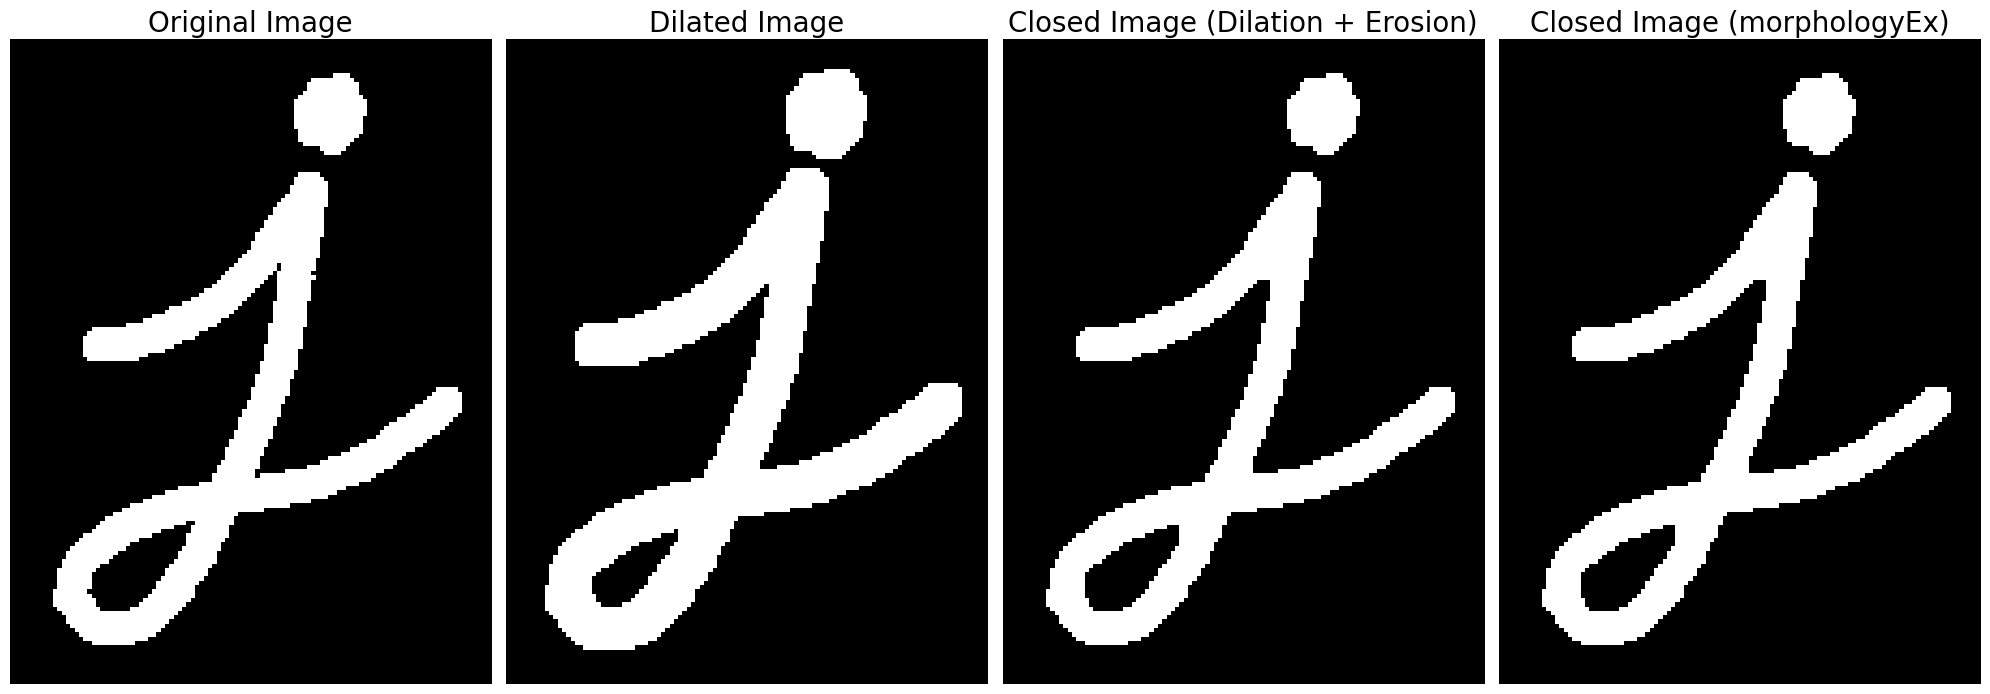

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 불러오기
image = cv2.imread('morphology_j.png', cv2.IMREAD_GRAYSCALE)

# 2. 이진화 처리 (이미지가 이미 이진화되어 있지 않을 경우)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 3. 구조 요소 정의
kernel = np.ones((3, 3), np.uint8)  # 3x3 구조 요소 생성

# 4. 팽창 연산 수행
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# 5. 팽창 후 침식 연산 수행
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. cv2.morphologyEx를 사용한 닫기 연산
morphology_closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# 7. 원본 이미지, 팽창 이미지, 팽창 후 침식 이미지, 닫기 이미지를 Matplotlib으로 출력
plt.figure(figsize=(20, 10))
fs = fontsize = 20

# 원본 이미지
plt.subplot(1, 4, 1)
plt.title("Original Image", fontsize=fs)
plt.imshow(binary_image, cmap='gray', interpolation='nearest')
plt.axis("off")

# 팽창된 이미지
plt.subplot(1, 4, 2)
plt.title("Dilated Image", fontsize=fs)
plt.imshow(dilated_image, cmap='gray', interpolation='nearest')
plt.axis("off")

# 팽창 후 침식된 이미지
plt.subplot(1, 4, 3)
plt.title("Closed Image (Dilation + Erosion)", fontsize=fs)
plt.imshow(eroded_image, cmap='gray', interpolation='nearest')
plt.axis("off")

# 닫기 연산 결과 이미지
plt.subplot(1, 4, 4)
plt.title("Closed Image (morphologyEx)", fontsize=fs)
plt.imshow(morphology_closed_image, cmap='gray', interpolation='nearest')
plt.axis("off")

plt.tight_layout()
plt.show()